In [ ]:
import io, os
input=io.BytesIO(os.read(0,os.fstat(0).st_size)).readline

def LPS(s):
  n = len(s)
  p = [[0] * (n + 1), [0] * n]

  for z, p_z in enumerate(p):
    left, right = 0, 0
    for i in range(n):
      t = right - i + 1 - z
      if i < right:
        p_z[i] = min(t, p_z[left + t])
      L, R = i - p_z[i], i + p_z[i] - 1 + z
      while (L >= 1) and (R + 1 < n) and (s[L - 1] == s[R + 1]):
        p_z[i] += 1
        L -= 1 
        R += 1
      if R > right:
        left, right = L, R
  return p

def sol(): 
  S = input().rstrip()
  print(sum(map(sum, LPS(S))) + len(S))

sol()

- 인접하지 않은 문자열끼리도 합쳤을 때 팰린드롬일지 알아야 한다.
- 부분문자열을 골라놓고 팰린드롬인지 확인하는 naive하게 방법은 $O(2^N)$ 이다.

### 태그힌트
- 포함배제의 원리가 있었다.
- 우선 팰린드롬에 성질에 의해 길이 $n$ 인 문자열 $s$ 가 팰린드롬이였다면, $s + c'$ 는 $c'$ 가 $s$ 의 모든 문자와 같아야만 $s+c'$ 가 팰린드롬이다.
  - $s + c$ 가 팰린드롬이려면 $s$ 가 팰린드롬이고, $c_n = c'$ 인지만 보면 될 것이다.
- 가장 바깥쪽 문자열 쌍을 하나씩 벗겨봤을 때, 그 문자열 쌍이 서로 같아야 한다.
  - $s = c_1c_2c_3...c_{n-1}c_n$ 라고 했을 때, $(c_1 = c_n) \land (c_2 = c_{n-1}) \land ... \land (c_{\frac{n}{2}} = c_{\frac{n}{2}+1})$ 일 때에만 팰린드롬이다.
- 두 가지를 어떻게든 합쳐 생각해보자. \
$1\leq a < b \leq N$ 인 $c_a$ 와 $c_b$ 사이의 $a < i \leq j < b$ 인 $c_i, c_j$ 쌍 중에서 $S[c_i] = S[c_j]$ 인 쌍의 개수를 세면 되지 않을까?
  - $i = j$ 일 경우 팰린드롬이니 1이다.

In [ ]:
import io, os
input=io.BytesIO(os.read(0,os.fstat(0).st_size)).readline

MOD = 10007
def sol(): 
  S = b'0' + input().rstrip()
  N = len(S) - 1
  
  DP = [[0] * (N+7) for _ in range(N+7)]
  DP2 = [[0] * (N+7) for _ in range(N+7)]
  
  ans = N
  for s in range(1, N) :
    for e in range(N, s, -1):
      if S[s] == S[e] :
        DP2[s][e] = (1 + DP[s-1][e+1]) % MOD
      DP[s][e] = (DP2[s][e] + DP[s][e+1] + DP[s-1][e] - DP[s-1][e+1]) % MOD
      ans = (ans + DP2[s][e] * (e-s)) % MOD
  print(ans % MOD)

sol()

### 풀이
- DP[s][e]: `[s, e]` 구간의 팰린드롬 개수. 태그를 보고나서 여기까지의 접근은 맞았다.
- 팰린드롬인지 아닌지는 문자열에따라 다르다. 
  - 그렇다면, 팰린드롬의 조건에 맞으면 경우의 수 1개씩 늘리고, 그렇지 않으면 그대로 전이하는 DP 패턴이 될 것이다.
    - 이런 패턴은 top-down의 접근방식이 더 자연스럽다. 
    - top-down은 전이시 범위가 점점 줄어들어야 함에 주의
  - DP[a][a] = 1이다. 팰린드롬이므로.
    - $1, \quad\text{if }s = e$
  - $S$ 내의 어떤 문자열의 양 끝이 같다면, 그 문자는 팰린드롬이다.  
    - $DP[s+1][e-1] + 1, \quad\text{if }S[s] = S[e]$ 
  - 그렇지 않다면 그대로 전이한다.
    - $DP[s+1][e] + DP[s][e+1], \quad\text{otherwise}$
- 그런데, 마지막 경우를 살펴보면 곂치는 부분이 존재하는 것을 관찰할 수 있다. 이 부분은 이 문제에서 제외되어야 한다.
  - 왜냐? DP의 정의상 경우의 수가, `팰린드롬이 가능했던 횟수`만큼 `누적`되기 때문이다. 
    - 문제 태그에 포함배제의 원리가 들어간 이유도 이것인 것 같다.\
    나는 이 태그의 의의가 홀수 번째는 더하고, 짝수 번째는 뺀다는 관점으로만 봤었는데, \
    사실은 경우의 수가 겹치니 그 만큼 빼주어야 한단 의미에 더 가까운 것이였다.\
    단지, 그 스텝이 1씩 늘어나는 것이다보니 포함배제 원리식이 들어갈 구석이 보일 뿐이였던거였다.\
    잘 구현만 한다면 포함배제의 원리의 그 식이 나올수도 있을 것 같다.
  - 구체적으로 얼만큼 겹치는지 그려본다면 다음과 같다.
    - 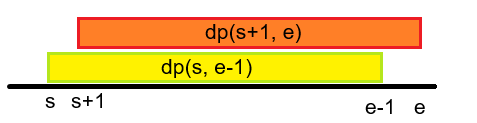
    - 겹치는 부분은 $DP[s+1][e-1]$ 만큼이다. 
- 따라서 최종 점화식은 다음과 같다
  - $DP[s][e] = \begin{cases} 1, &\text {if }s = e \\  1 + DP[s+1][e-1], &\text {if } S[s] = S[e] \\ DP[s+1][e] + DP[s][e-1] - DP[s+1][e-1], &\text{otherwise} \end{cases}$

In [ ]:
import io, os
input=io.BytesIO(os.read(0,os.fstat(0).st_size)).readline

MOD = 10007
NONE = -1
def sol(): 
  S = input().rstrip()
  N = len(S)
  
  DP = [[NONE] * (N+7) for _ in range(N+7)]
  S2 = [(0, N-1)] #스택은 사랑입니다
  while S2:
    s, e = S2.pop()
    if s > e: 
      DP[s][e] = 0
      continue
    if s == e:
      DP[s][e] = 1
      continue
    
    if DP[s][e-1] == NONE :
      S2.append((s, e))
      S2.append((s, e-1))
      continue
    if DP[s+1][e] == NONE :
      S2.append((s, e))
      S2.append((s+1, e))
      continue
    if DP[s+1][e-1] == NONE :
      S2.append((s, e))
      S2.append((s+1, e-1))
      continue
    
    res = DP[s][e-1] + DP[s+1][e] - DP[s+1][e-1]
    res %= MOD
    
    if S[s] == S[e]:
      res += DP[s+1][e-1] + 1
      res %= MOD

    DP[s][e] = res % MOD

  print(DP[0][N-1])

sol()

- 비재귀 기술이 더 늘었다.
  - 재귀: 158128KB / 372ms
  - 비재귀: 118880KB / 172ms

In [ ]:
import io, os
input=io.BytesIO(os.read(0,os.fstat(0).st_size)).readline

MOD = 10007
NONE = -1
def sol(): 
  S = input().rstrip()
  N = len(S)
  
  DP = [[NONE] * (N+7) for _ in range(N+7)]
  S2 = [(0, N-1)] #스택은 사랑입니다
  tmp = [] 
  while S2:
    s, e = S2.pop()
    if s > e: 
      DP[s][e] = 0
      continue
    if s == e:
      DP[s][e] = 1
      continue
    
    if DP[s][e-1] == NONE : tmp.append((s, e-1))
    if DP[s+1][e] == NONE : tmp.append((s+1, e))
    if DP[s+1][e-1] == NONE : tmp.append((s+1, e-1))
    
    if tmp : 
      S2.append((s, e))
      S2.extend(tmp)
      tmp.clear()
      continue

    res = DP[s][e-1] + DP[s+1][e] - DP[s+1][e-1]
    res %= MOD
    
    if S[s] == S[e]:
      res += DP[s+1][e-1] + 1
      res %= MOD

    DP[s][e] = res % MOD

  print(DP[0][N-1])

sol()

- 이런저런 최적화를 해본다고 해본건데, 거의 개선이 되지 않는다.
- 다만 깔끔하긴 하니까 이 방식을 주류로 쓰면 될거같다.